# initialize training set
- randomly sample frames from video
- perform k-means clustering to select distinct frames
- save as dataset than can be subsequently labelled

This code is modified from [here](https://colab.research.google.com/github/jgraving/deepposekit/blob/master/examples/step1_create_annotation_set.ipynb).

In [8]:
# initialization
import numpy as np
from deepposekit.io import VideoReader, DataGenerator, initialize_dataset
from deepposekit.annotate import KMeansSampler
from tqdm.notebook import tqdm
from os.path import join
%matplotlib inline

# settings
git_dir = r'D:\github\fish-tracking'
dataset_name = 'tank_dataset_0'
skeleton = r'D:\github\fish-tracking\label\skeletons\tank_skeleton.csv'
video = r'Z:\locker\ShareData\tank_for_rick\tank_vids\20200909\concatenated.avi'  # frames are picked from this video
n_frames = 20  # frames to include in training set
n_random_frames = 1000  # perform clustering on random sub sample of n_random_frames

In [9]:
# sample random frames from video
reader = VideoReader(video, gray=True, batch_size=1)
random_frames = []
n_random_frames = min(n_random_frames, len(reader))
for idx in tqdm(np.sort(np.random.choice(len(reader), n_random_frames))):
    random_frames.append(reader[idx])
reader.close()
random_frames = np.concatenate(random_frames)

Init 1/10 with method: k-means++
Inertia for init 1/10: 4655604116.451826
Init 2/10 with method: k-means++
Inertia for init 2/10: 4693670920.058935
Init 3/10 with method: k-means++
Inertia for init 3/10: 4700839864.273983
Init 4/10 with method: k-means++
Inertia for init 4/10: 4886342346.163510
Init 5/10 with method: k-means++
Inertia for init 5/10: 4588927620.631456
Init 6/10 with method: k-means++
Inertia for init 6/10: 4619149659.116085
Init 7/10 with method: k-means++
Inertia for init 7/10: 4640765286.668119
Init 8/10 with method: k-means++
Inertia for init 8/10: 4467432547.592292
Init 9/10 with method: k-means++
Inertia for init 9/10: 4481875223.094900
Init 10/10 with method: k-means++
Inertia for init 10/10: 4705381895.774935
Minibatch iteration 1/10000: mean batch inertia: 19483117.516993, ewa inertia: 19483117.516993 
Minibatch iteration 2/10000: mean batch inertia: 17675912.034860, ewa inertia: 19122037.500583 
Minibatch iteration 3/10000: mean batch inertia: 19193801.767188, 

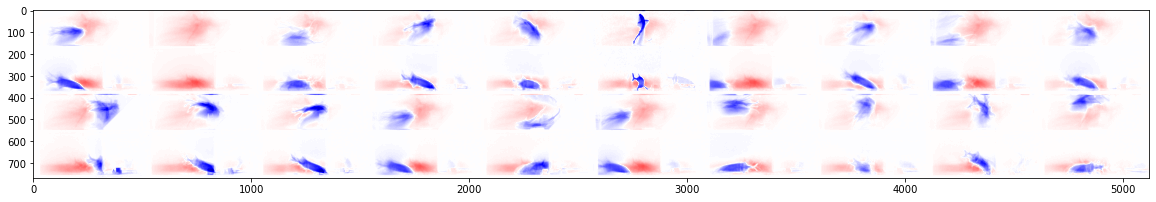

In [10]:
# k-means clustering
n_clusters = 20
kmeans = KMeansSampler(n_clusters=n_clusters, max_iter=1000, n_init=10, batch_size=100, verbose=True)
kmeans.fit(random_frames)
kmeans.plot_centers(n_rows=2)
kmeans_sampled_frames, kmeans_cluster_labels = kmeans.sample_data(
    random_frames, n_samples_per_label=np.ceil(n_frames/n_clusters).astype('int'))

In [15]:
# initialize dataset
initialize_dataset(
    images=kmeans_sampled_frames,
    datapath=join(git_dir, 'label', 'datasets', dataset_name+'.h5'),
    skeleton=skeleton,
    overwrite=True
)

# change skeleton for existing dataset

In [4]:
from deepposekit.io.utils import update_skeleton
%load_ext autoreload
%autoreload 2

# settings
old_dataset = r'D:\github\fish-tracking\label\datasets\tank_dataset_0.h5'
new_dataset = r'D:\github\fish-tracking\label\datasets\tank_dataset_1.h5'
new_skeleton = r'D:\github\fish-tracking\label\skeletons\tank_skeleton_1.csv'

update_skeleton(old_dataset, new_dataset, new_skeleton)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
